# **Gráficos Estadísticos**

## **Gráfico de barras**

Si deseas visualizar la cantidad de productos por categoría, puedes crear un gráfico de barras

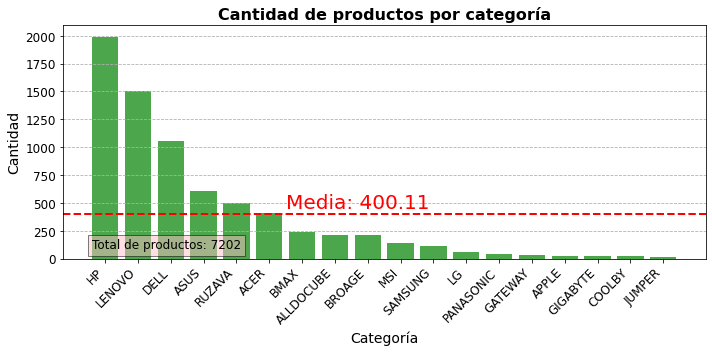

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('./data/productos_limpios.csv')

plt.figure(figsize=(10, 5))
plt.bar(df['Category'].value_counts().index,
        df['Category'].value_counts().values, color='green', alpha=0.7)
plt.title('Cantidad de productos por categoría', fontsize=16,
          fontweight='bold')  # Agrega negritas al título
plt.xlabel('Categoría', fontsize=14)
plt.ylabel('Cantidad', fontsize=14)
# ajusta las etiquetas del eje x
plt.xticks(fontsize=12, rotation=45, ha='right')
plt.yticks(fontsize=12)  # ajusta las etiquetas del eje y
plt.grid(axis='y', linestyle='--')  # agrega una rejilla horizontal
plt.tight_layout()  # ajusta los márgenes para evitar cortar las etiquetas

# Agregar texto adicional en el gráfico
plt.text(-0.4, 90, 'Total de productos: {}'.format(len(df)),
         fontsize=12, bbox=dict(facecolor='pink', alpha=0.5))

# Agregar una línea horizontal en la media de la cantidad de productos por categoría
mean = df['Category'].value_counts().mean()
plt.axhline(y=mean, color='red', linestyle='--', linewidth=2)
plt.text(5.5, mean+50, 'Media: {:.2f}'.format(mean), fontsize=20, color='red')

plt.show()


## **Gráfico de dispersión**

Si deseas visualizar la relación entre el precio actual y el precio anterior, puedes crear un gráfico de dispersión

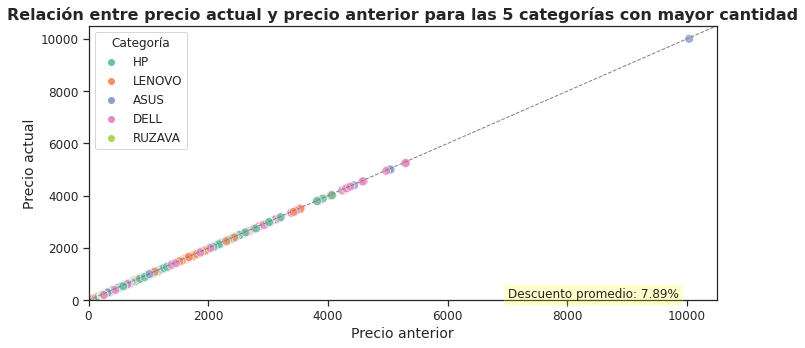

In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('./data/productos_limpios.csv')

# Para filtrar los 5 categories con mayor cantidad, primero debemos contar cuántas veces aparece cada categoría en nuestro dataframe.
top_categories = df['Category'].value_counts().nlargest(5).index.tolist()

# podemos filtrar el dataframe original para que solo incluya las filas correspondientes a esas categorías
df_top_categories = df[df['Category'].isin(top_categories)]


plt.figure(figsize=(10, 5))

# Cambiar el estilo del fondo y las líneas de la cuadrícula
sns.set(style='ticks', color_codes=True)
sns.scatterplot(x='Price_Before', y='Price_Now', data=df_top_categories,
                hue='Category', palette='Set2', alpha=0.8, s=80)
plt.title('Relación entre precio actual y precio anterior para las 5 categorías con mayor cantidad',
          fontsize=16, fontweight='bold')
plt.xlabel('Precio anterior', fontsize=14)
plt.ylabel('Precio actual', fontsize=14)

# Ajustar las etiquetas de los ejes
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Agregar una leyenda y ajustar su posición
plt.legend(title='Categoría', loc='upper left', fontsize=12, title_fontsize=12)

# Ajustar los límites de los ejes
plt.xlim(0, 10500)
plt.ylim(0, 10500)

# Agregar una línea diagonal para resaltar la relación 1:1
plt.plot([0, 10500], [0, 10500], color='gray', linestyle='--', linewidth=1)

# Agregar texto adicional en el gráfico
plt.text(7000, 100, 'Descuento promedio: {:.2f}%'.format(
    df_top_categories['Discounts %'].mean()), fontsize=12, bbox=dict(facecolor='yellow', alpha=0.2))

# Ajustar los márgenes del gráfico para evitar que se corten las etiquetas
plt.tight_layout()

plt.show()



## **Histograma**

Si deseas visualizar la distribución de la variable 'Price_Now', puedes crear un histograma

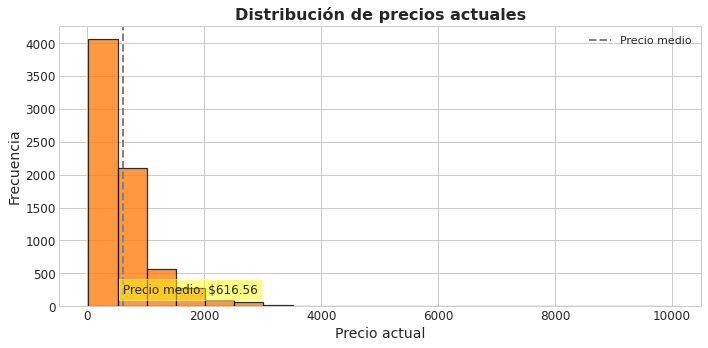

In [36]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('./data/productos_limpios.csv')

plt.figure(figsize=(10, 5))

# Cambiar el estilo del fondo y las líneas de la cuadrícula
plt.style.use('seaborn-whitegrid')

# Cambiar el color de las barras
color = '#ff7f0e'

# Dibujar el histograma
plt.hist(df['Price_Now'], bins=20, color=color, alpha=0.8, edgecolor='black', linewidth=1.2)

# Añadir una línea vertical para mostrar la media
mean_price = df['Price_Now'].mean()
plt.axvline(mean_price, color='gray', linestyle='--', linewidth=2)
plt.text(mean_price, 200, 'Precio medio: ${:.2f}'.format(
    mean_price),fontsize=12, bbox=dict(facecolor='yellow', alpha=0.5) )

# Añadir un título y etiquetas de los ejes
plt.title('Distribución de precios actuales', fontsize=16, fontweight='bold')
plt.xlabel('Precio actual', fontsize=14)
plt.ylabel('Frecuencia', fontsize=14)

# Ajustar las etiquetas de los ejes
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Agregar una leyenda
plt.legend(['Precio medio'])

# Ajustar los márgenes del gráfico para evitar que se corten las etiquetas
plt.tight_layout()

plt.show()


## **Gráfico de violín**

Si deseas visualizar la distribución de la variable 'Rating' por categoría, puedes crear un gráfico de violín

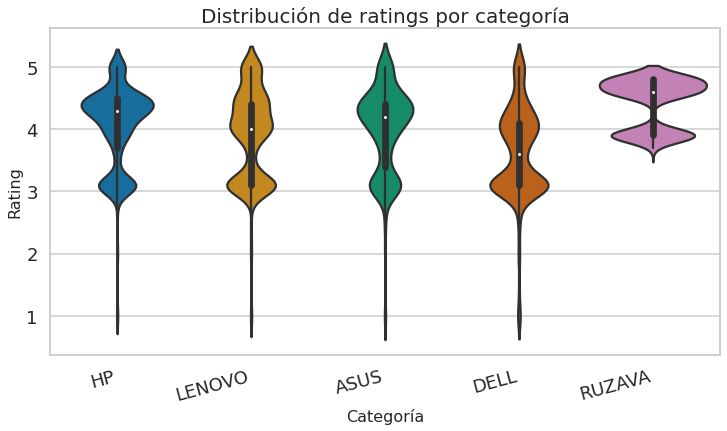

In [38]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar los datos
df = pd.read_csv('./data/productos_limpios.csv')

# Contar cuántas veces aparece cada categoría en el dataframe
top_categories = df['Category'].value_counts().nlargest(5).index.tolist()

# Filtrar el dataframe original para que solo incluya las filas correspondientes a esas categorías
df_top_categories = df[df['Category'].isin(top_categories)]

# Personalizar el gráfico
sns.set_style("whitegrid")
sns.set_palette("colorblind")
sns.set_context("talk", font_scale=1.1)
plt.figure(figsize=(12, 6))

# Graficar la distribución de ratings por categoría
sns.violinplot(x='Category', y='Rating', data=df_top_categories)

# Agregar títulos y etiquetas
plt.title('Distribución de ratings por categoría', fontsize=20)
plt.xlabel('Categoría', fontsize=16)
plt.ylabel('Rating', fontsize=16)

# Ajustar las etiquetas del eje x
plt.xticks(rotation=15, ha='right')

# Mostrar el gráfico
plt.show()


## **Gráfico de pastel**

Si desea visualizar la proporción de productos en stock y fuera de stock, puede crear un gráfico de pastel

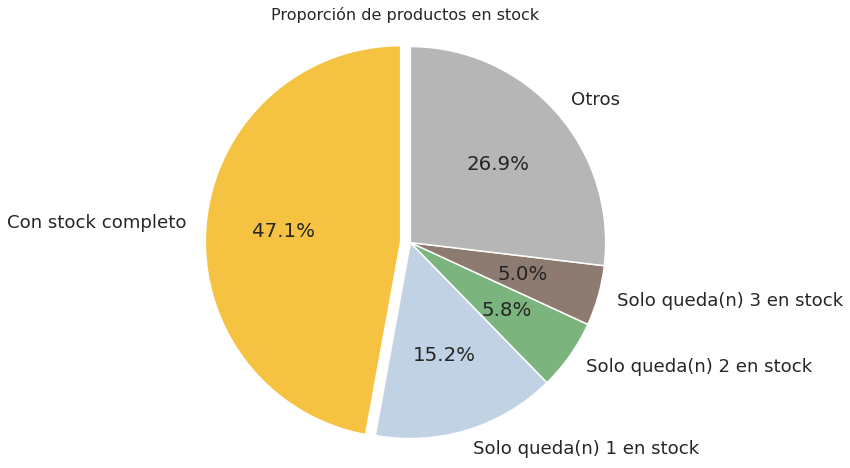

In [43]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('./data/productos_limpios.csv')

# Convertir la columna "Stock" a tipo str y contar los valores
stock_counts = df['Stock'].astype(str).value_counts()

# Seleccionar los 4 valores con mayor porcentaje y agrupar los demás en una categoría "Otros"
top_stock = stock_counts.nlargest(4)
others_stock = pd.Series(stock_counts.loc[~stock_counts.index.isin(
    top_stock.index)].sum(), index=['Otros'])

# Concatenar los dos objetos Series
stock_counts = pd.concat([top_stock, others_stock])

# Personalizar la gráfica
colors = ['#f5c242', '#c2d2e5', '#7cb47d', '#8d7a71', '#b6b6b6']
plt.figure(figsize=(8, 8))
plt.pie(stock_counts.values, labels=stock_counts.index, colors=colors,
        autopct='%1.1f%%', startangle=90, explode=(0.05, 0, 0, 0, 0))
plt.title('Proporción de productos en stock', fontdict={'fontsize': 16})
plt.axis('equal')
plt.show()


## **Gráfico de barras horizontales**

Si desea visualizar los descuentos promedio por categoría, puede crear un gráfico de barras horizontales

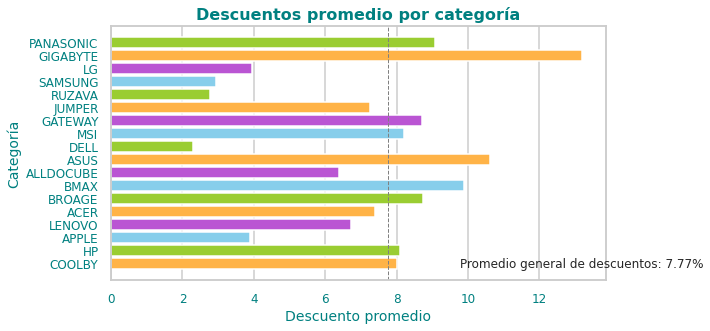

In [45]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('./data/productos_limpios.csv')

plt.figure(figsize=(10, 5))

#Cambiar el color de las barras
colors = ['#FFB347', '#9ACD32', '#87CEEB', '#BA55D3']
plt.barh(df['Category'].unique(), df.groupby(
    'Category')['Discounts %'].mean(), color=colors)

#Añadir una línea horizontal en el valor promedio general de descuentos
plt.axvline(df['Discounts %'].mean(), color='gray',
            linestyle='--', linewidth=1)

#Agregar texto adicional en el gráfico
plt.text(df['Discounts %'].mean() + 2, -0.3,
         'Promedio general de descuentos: {:.2f}%'.format(df['Discounts %'].mean()), fontsize=12)

plt.title('Descuentos promedio por categoría',
          fontsize=16, fontweight='bold', color='#008080')
plt.xlabel('Descuento promedio', fontsize=14, color='#008080')
plt.ylabel('Categoría', fontsize=14, color='#008080')

#Ajustar las etiquetas de los ejes
plt.xticks(fontsize=12, color='#008080')
plt.yticks(fontsize=12, color='#008080')

#Ajustar los márgenes del gráfico para evitar que se corten las etiquetas
plt.tight_layout()

#Agregar una línea de grid en el eje y
plt.grid(axis='y')

plt.show()


## **Gráfico de heatmap**

Si se desea visualizar la relación entre las variables numéricas en una matriz de correlación, se puede crear un gráfico de heatmap

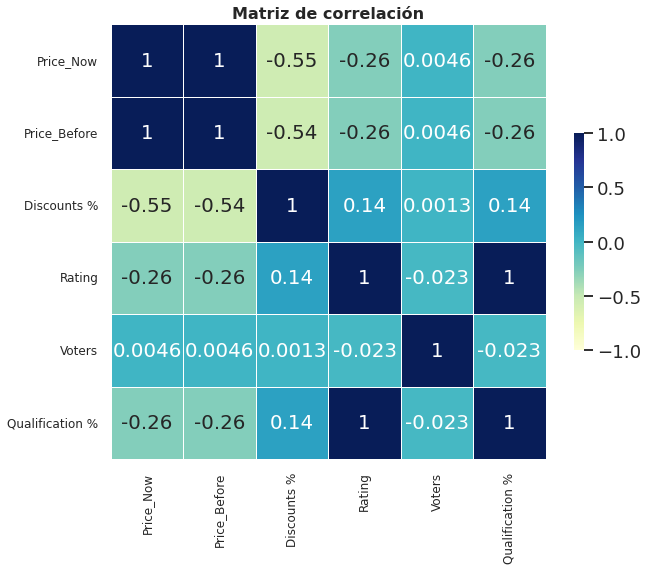

In [46]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('./data/productos_limpios.csv')

plt.figure(figsize=(10, 8))
sns.set_style("whitegrid")  # Cambiar estilo de la grilla
sns.heatmap(df.corr(), annot=True, cmap="YlGnBu", vmin=-1, vmax=1,
            center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title('Matriz de correlación', fontsize=16, fontweight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()


## **Gráfico de torta**

Se puede crear un gráfico de torta para ver la proporción de cada categoría en la variable 'Category'

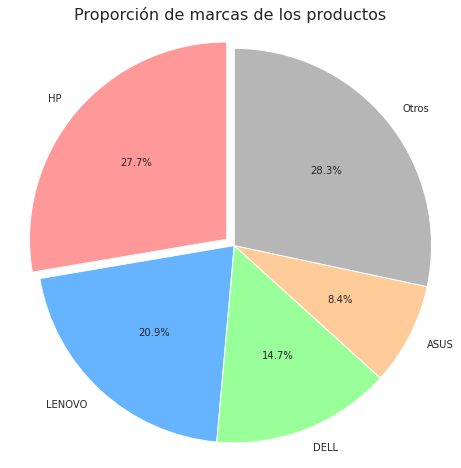

In [37]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('./data/productos_limpios.csv')

# Convertir la columna "Category" a tipo str y contar los valores
category_counts = df['Category'].astype(str).value_counts()

# Seleccionar los 4 valores con mayor porcentaje y agrupar los demás en una categoría "Otros"
top_category = category_counts.nlargest(4)
others_category = pd.Series(category_counts.loc[~category_counts.index.isin(
    top_category.index)].sum(), index=['Otros'])

# Concatenar los dos objetos Series
category_counts = pd.concat([top_category, others_category])

# Definir una lista de colores personalizados
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#b6b6b6']

# Personalizar la gráfica
plt.figure(figsize=(8, 8))
plt.pie(category_counts.values, labels=category_counts.index, colors=colors,
        autopct='%1.1f%%', startangle=90, explode=(0.05, 0, 0, 0, 0))
plt.title('Proporción de marcas de los productos', fontdict={'fontsize': 16})
plt.axis('equal')
plt.show()


## **Gráfico de dispersión**

'Rating', 'Voters' y 'Qualification %': Si las variables 'Rating', 'Voters' y 'Qualification %' son numéricas, se puede crear un gráfico de dispersión para ver la relación entre ellas.

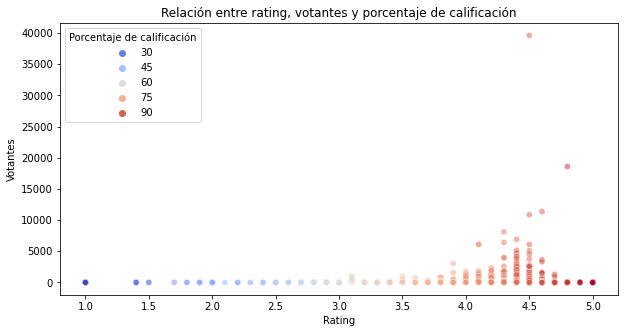

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('./data/productos_limpios.csv')

plt.figure(figsize=(10, 5))
sns.scatterplot(x='Rating', y='Voters', data=df, hue='Qualification %',
                palette='coolwarm', sizes=(20, 200), alpha=0.5)
plt.title('Relación entre rating, votantes y porcentaje de calificación')
plt.xlabel('Rating')
plt.ylabel('Votantes')
plt.legend(title='Porcentaje de calificación')
plt.show()


## **Gráfico de caja**

'Discounts %': Si la variable 'Discounts %' es numérica, se puede crear un gráfico de caja para ver la distribución de los descuentos.

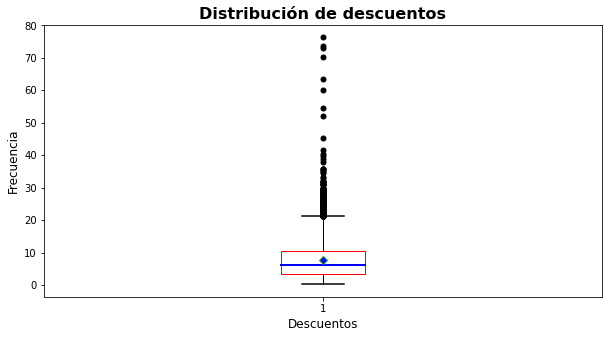

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('./data/productos_limpios.csv')

plt.figure(figsize=(10, 5))

bp = plt.boxplot(df['Discounts %'], showmeans=True, boxprops=dict(color='red'), whiskerprops=dict(linestyle='--'))

plt.setp(bp['fliers'], marker='o', markersize=5, markerfacecolor='black', markeredgecolor='black')
plt.setp(bp['whiskers'], color='black', linestyle='-')
plt.setp(bp['caps'], color='black', linewidth=1.5)
plt.setp(bp['medians'], color='blue', linewidth=2)
plt.setp(bp['means'], marker='D', markersize=5, markerfacecolor='blue')

plt.title('Distribución de descuentos', fontweight='bold', fontsize=16)
plt.xlabel('Descuentos', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.show()


## **Gráfico de histograma**

'Price_Now' y 'Price_Before': Si las variables 'Price_Now' y 'Price_Before' son numéricas, se puede crear un gráfico de histograma para ver la distribución de los precios.

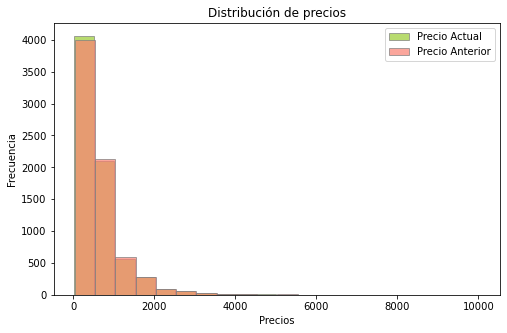

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('./data/productos_limpios.csv')

plt.figure(figsize=(8, 5))
plt.hist(df['Price_Now'], bins=20, alpha=0.7, color='#9ACD32', edgecolor='gray', label='Precio Actual')
plt.hist(df['Price_Before'], bins=20, alpha=0.7, color='#FA8072', edgecolor='gray', label='Precio Anterior')
plt.title('Distribución de precios')
plt.xlabel('Precios')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()


## **Gráfico de barras**

'Category': Si la variable 'Category' es categórica, se puede crear un gráfico de barras para ver la frecuencia de cada categoría.

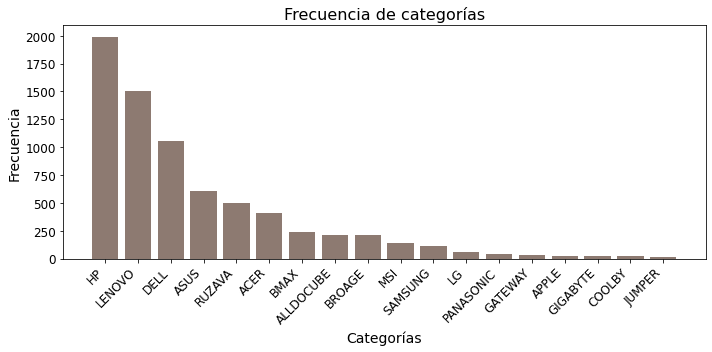

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('./data/productos_limpios.csv')

plt.figure(figsize=(10, 5))
plt.bar(df['Category'].value_counts().index, df['Category'].value_counts().values, color='#8d7a71')
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.title('Frecuencia de categorías', fontsize=16)
plt.xlabel('Categorías', fontsize=14)
plt.ylabel('Frecuencia', fontsize=14)
plt.tick_params(axis='both', which='major', labelsize=12)
plt.tight_layout()
plt.show()

## **Gráfico de barras horizontales**

Gráfico de barras horizontales de la cantidad de productos por categoría:

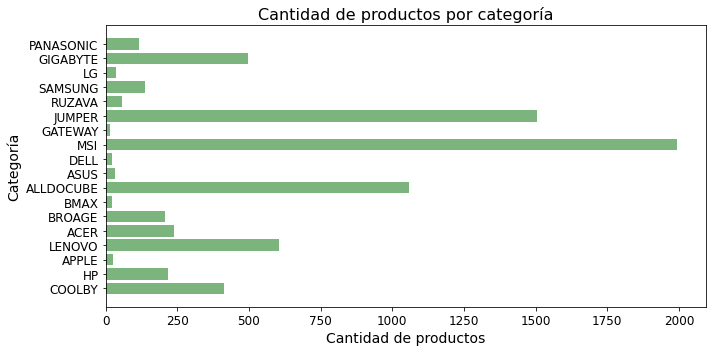

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('./data/productos_limpios.csv')

plt.figure(figsize=(10, 5))
plt.barh(df['Category'].unique(), df.groupby('Category')['Product'].count(), color='#7cb47d')
plt.title('Cantidad de productos por categoría', fontsize=16)
plt.xlabel('Cantidad de productos', fontsize=14)
plt.ylabel('Categoría', fontsize=14)
plt.tick_params(axis='both', which='major', labelsize=12)
plt.tight_layout()
plt.show()

## **Gráfico de barras verticales**

Gráfico de barras verticales del descuento promedio por categoría:

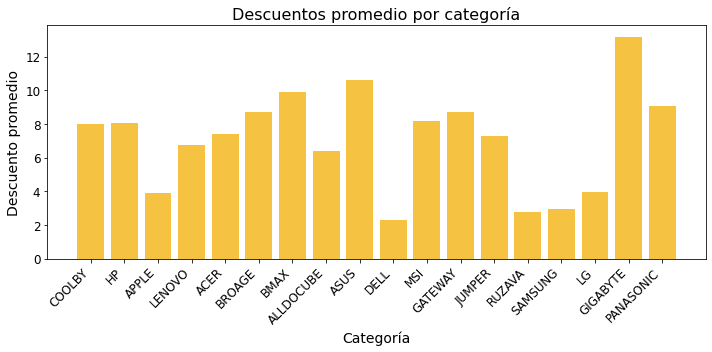

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('./data/productos_limpios.csv')

plt.figure(figsize=(10, 5))
plt.bar(df['Category'].unique(), df.groupby('Category')
        ['Discounts %'].mean(), color='#f5c242')
plt.title('Descuentos promedio por categoría', fontsize=16)
plt.xlabel('Categoría', fontsize=14)
plt.ylabel('Descuento promedio', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.tick_params(axis='both', which='major', labelsize=12)
plt.tight_layout()
plt.show()


## **Gráfico de barras horizontales**

Gráfico de barras horizontales del rating promedio por categoría:

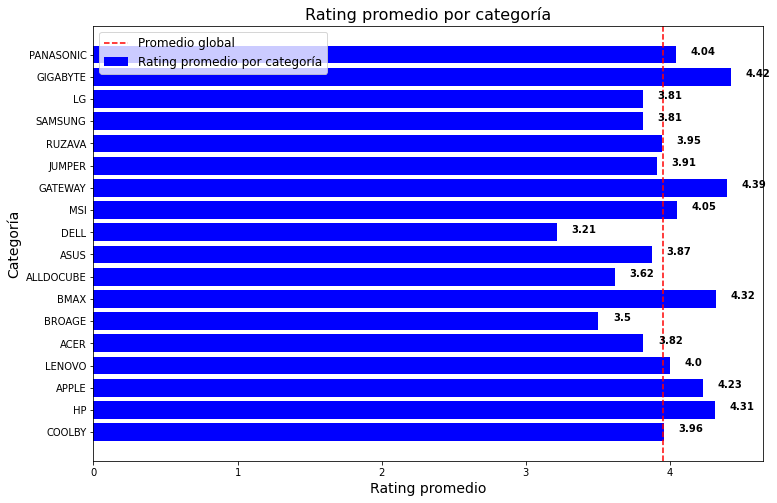

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('./data/productos_limpios.csv')

plt.figure(figsize=(12, 8))
plt.barh(df['Category'].unique(), df.groupby(
    'Category')['Rating'].mean(), color='blue')
plt.axvline(df['Rating'].mean(), color='red', linestyle='--')
for i, v in enumerate(df.groupby('Category')['Rating'].mean()):
    plt.text(v+0.1, i, str(round(v, 2)), color='black', fontweight='bold')
plt.title('Rating promedio por categoría', fontsize=16)
plt.xlabel('Rating promedio', fontsize=14)
plt.ylabel('Categoría', fontsize=14)
plt.legend(['Promedio global', 'Rating promedio por categoría'], fontsize=12)
plt.show()


## **Gráfico de barras horizontales**

Gráfico de barras horizontales para mostrar el precio actual promedio por categoría:

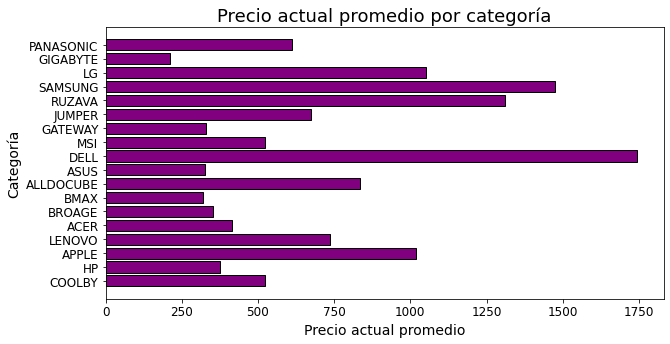

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('./data/productos_limpios.csv')

plt.figure(figsize=(10, 5))
plt.barh(df['Category'].unique(), df.groupby('Category')['Price_Now'].mean(), color='purple', edgecolor='black')
plt.title('Precio actual promedio por categoría', fontsize=18)
plt.xlabel('Precio actual promedio', fontsize=14)
plt.ylabel('Categoría', fontsize=14)
plt.tick_params(labelsize=12)
plt.show()


## **Gráfico de dispersión**

Gráfico de dispersión para mostrar la relación entre el rating y el precio actual, con el tamaño de los puntos representando el descuento promedio:

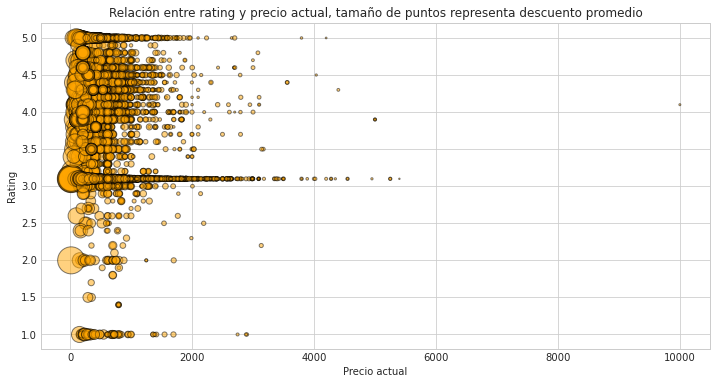

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('./data/productos_limpios.csv')

plt.figure(figsize=(12, 6))  # Tamaño del gráfico
plt.scatter(df['Price_Now'], df['Rating'], s=df['Discounts %']*10, alpha=0.5,
            c='orange', edgecolor='black')  # Colores y tamaño de los puntos
plt.title('Relación entre rating y precio actual, tamaño de puntos representa descuento promedio')  # Título del gráfico
plt.xlabel('Precio actual')  # Título del eje x
plt.ylabel('Rating')  # Título del eje y
plt.show()


## **Diagrama de barras apiladas**

Diagrama de barras apiladas: Puedes utilizar esta visualización para mostrar la relación entre el precio actual, el precio anterior y el descuento para cada categoría. Puedes apilar las barras para mostrar el precio actual, el precio anterior y el descuento en diferentes colores.

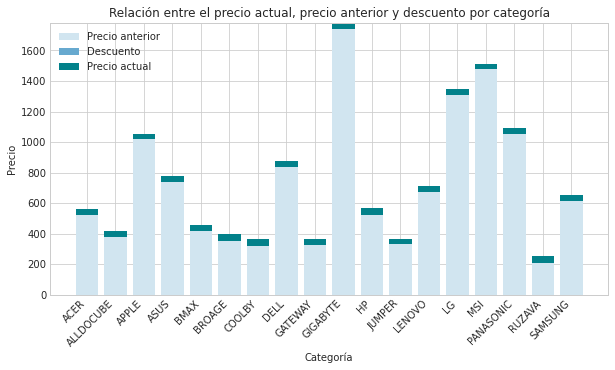

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('./data/productos_limpios.csv')

#Agrupar los datos por categoría
grouped = df.groupby('Category').mean()

#Crear una figura con subplots
fig, ax = plt.subplots(figsize=(10, 5))

#Definir los valores para cada categoría y variable
precio_actual = grouped['Price_Now']
precio_anterior = grouped['Price_Before']
descuento = grouped['Discounts %']

#Crear las barras apiladas
ax.bar(precio_actual.index, precio_anterior,
label='Precio anterior', color='#d1e5f0')
ax.bar(precio_actual.index, descuento, bottom=precio_anterior,
label='Descuento', color='#67a9cf')
ax.bar(precio_actual.index, precio_actual - precio_anterior - descuento,
bottom=precio_anterior + descuento, label='Precio actual', color='#02818a')
plt.xticks(rotation=45, ha='right', fontsize=10)
#Agregar títulos y leyendas
ax.set_title(
'Relación entre el precio actual, precio anterior y descuento por categoría')
ax.set_xlabel('Categoría')
ax.set_ylabel('Precio')
ax.legend()

#Mostrar el gráfico
plt.show()

## **Mapa de calor**

Mapa de calor: Puedes utilizar un mapa de calor para mostrar la relación entre la calificación, el número de votantes y el porcentaje de calificación para cada producto. Puedes utilizar diferentes colores para mostrar diferentes rangos de valores.

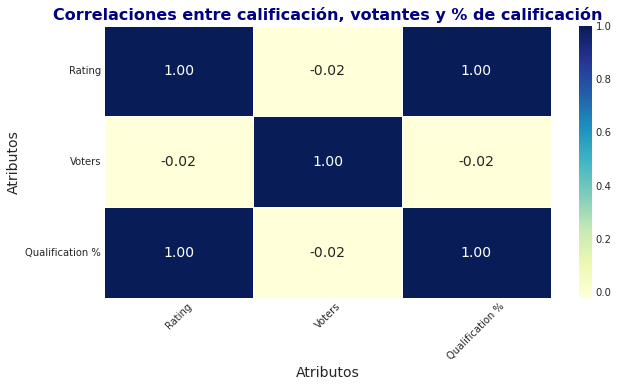

In [29]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('./data/productos_limpios.csv')

plt.figure(figsize=(10, 5))
sns.heatmap(df[['Rating', 'Voters', 'Qualification %']].corr(),
            annot=True, cmap='YlGnBu', linewidths=.5, fmt='.2f', annot_kws={"size": 14})
plt.title('Correlaciones entre calificación, votantes y % de calificación',
          fontsize=16, fontweight='bold', color='navy')
plt.xlabel('Atributos', fontsize=14)
plt.ylabel('Atributos', fontsize=14)
plt.yticks(rotation=0)
plt.xticks(rotation=45)
plt.tick_params(axis='both', which='both', length=0)
plt.gca().set_facecolor('white')
plt.gca().grid(color='grey', linestyle='-', linewidth=0.2)
plt.show()


## **Diagrama de cajas**

Diagrama de cajas: Puedes utilizar un diagrama de cajas para mostrar la distribución del precio actual para cada categoría.

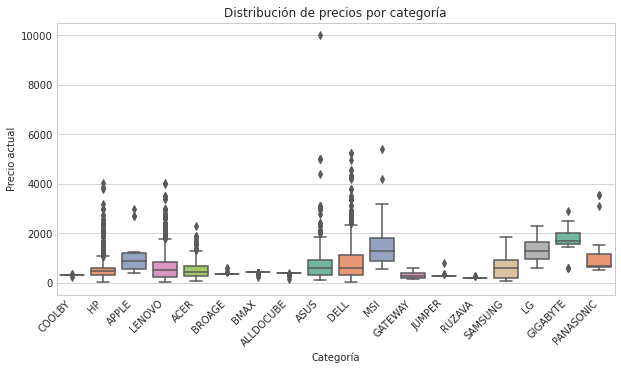

In [33]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('./data/productos_limpios.csv')

sns.set_style('whitegrid')
plt.figure(figsize=(10, 5))
sns.boxplot(x='Category', y='Price_Now', data=df, palette='Set2')
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.title('Distribución de precios por categoría')
plt.xlabel('Categoría')
plt.ylabel('Precio actual')
plt.show()


## **Diagrama de dispersión**

Diagrama de dispersión con líneas de tendencia: Puedes utilizar un diagrama de dispersión con líneas de tendencia para mostrar la relación entre el precio actual y el número de votantes para cada producto. Puedes utilizar diferentes colores para mostrar diferentes categorías.

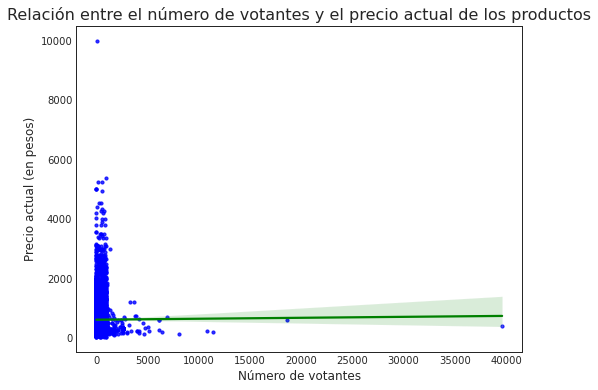

In [36]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('./data/productos_limpios.csv')

plt.figure(figsize=(8, 6))
sns.set_style("white")
sns.regplot(x='Voters', y='Price_Now', data=df, scatter_kws={
            's': 10, 'color': 'blue'}, line_kws={'color': 'green'})
plt.title('Relación entre el número de votantes y el precio actual de los productos', fontsize=16)
plt.xlabel('Número de votantes', fontsize=12)
plt.ylabel('Precio actual (en pesos)', fontsize=12)
plt.show()
